# Paso 1: Preparar los Datos

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df=pd.read_excel("/content/Base final caso 2.xlsx")
df.head(10)

,Fecha,Num_referidos
0,2017-01-01,14
1,2017-02-01,13
2,2017-03-01,22
3,2017-04-01,23
4,2017-05-01,16
5,2017-06-01,12
6,2017-07-01,14
7,2017-08-01,6
8,2017-09-01,7
9,2017-10-01,8


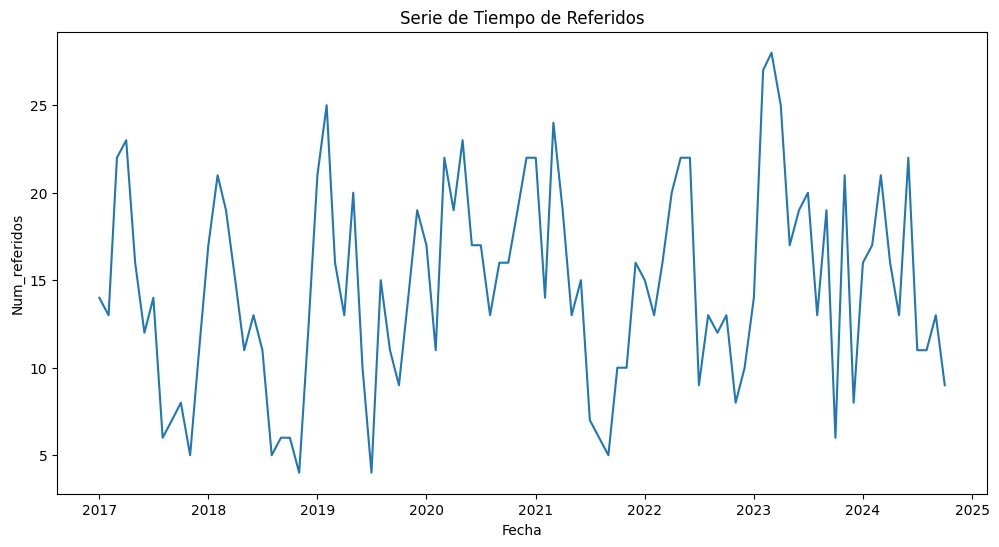

In [ ]:
# Graficar la serie de tiempo para observar patrones
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Num_referidos'])
plt.xlabel('Fecha')
plt.ylabel('Num_referidos')
plt.title('Serie de Tiempo de Referidos') # Adjusted the title
plt.show()

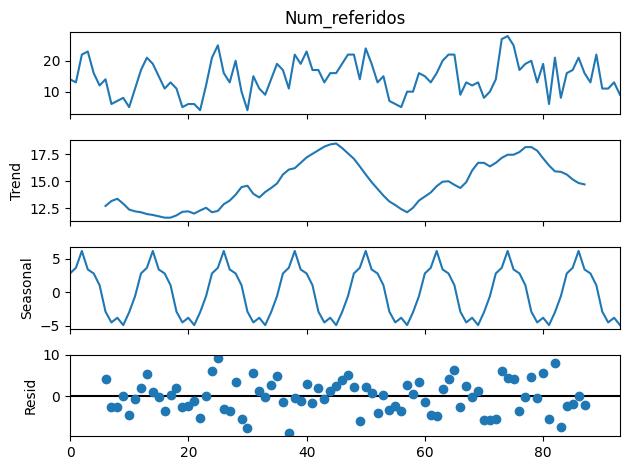

In [ ]:
# Descomposición de la serie de tiempo para analizar tendencia y estacionalidad
result = seasonal_decompose(df['Num_referidos'], model='additive', period=12)
result.plot()
plt.show()

# Paso 2: Análisis de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Prueba de Dickey-Fuller para verificar la estacionariedad
result = adfuller(df['Num_referidos'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print("La serie de tiempo es estacionaria.")
else:
    print("La serie de tiempo no es estacionaria.")

ADF Statistic: -5.604085328745855
p-value: 1.2456509776127582e-06
Critical Values: {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}
La serie de tiempo es estacionaria.


Las gráficas ACF y PACF nos ayudan a identificar los valores adecuados para los parámetros de los modelos ARIMA:

* 𝑝: Orden autorregresivo, relacionado con la PACF.

* 𝑑: Número de diferencias necesarias para hacer estacionaria la serie.

* 𝑞: Orden de la media móvil, relacionado con la ACF.

Vamos a graficar las funciones ACF y PACF para decidir estos valores.

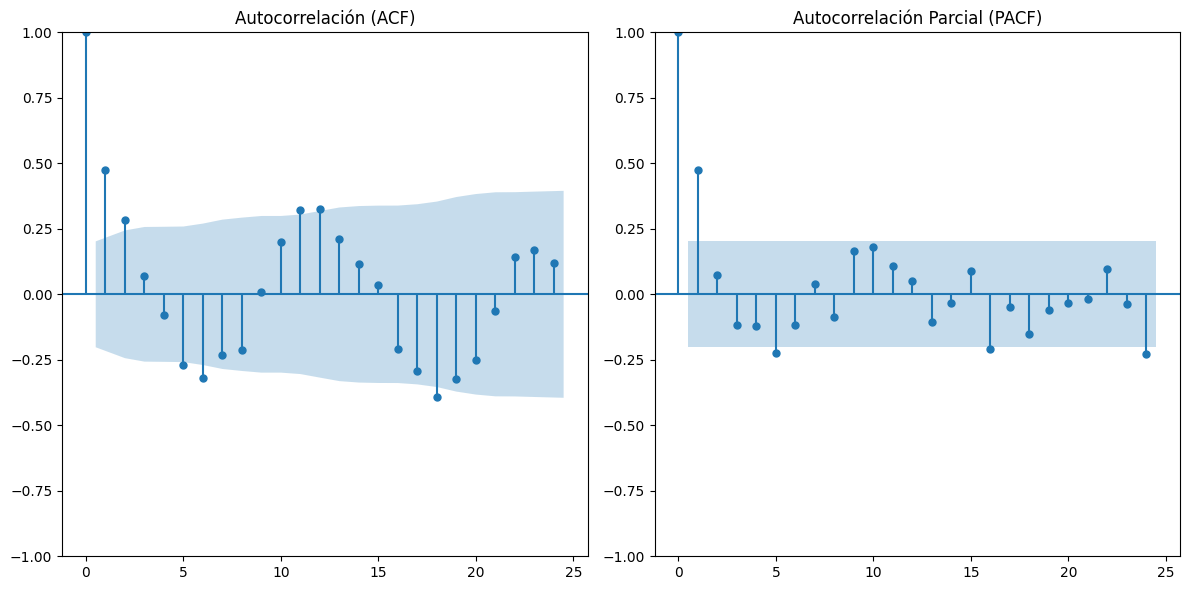

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar ACF y PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(df['Num_referidos'], lags=24, ax=plt.gca())
plt.title('Autocorrelación (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(df['Num_referidos'], lags=24, ax=plt.gca())
plt.title('Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()


# Paso 3: Configuración Inicial del Modelo ARIMA

Con base en estas observaciones, podríamos empezar con un modelo ARIMA(p, d, q), con un valor inicial de:

* 𝑝 = 1 (autorregresivo).
* 𝑑 = 1 (diferencia de primer orden, si queremos hacer la serie más estacionaria).
* 𝑞 = 1 (orden de media móvil simple).

Veamos cómo implementar este modelo y ajustar los parámetros, y luego podríamos considerar SARIMA si identificamos estacionalidad fuerte.

                               SARIMAX Results                                
Dep. Variable:          Num_referidos   No. Observations:                   94
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -283.682
Date:                Thu, 07 Nov 2024   AIC                            573.364
Time:                        00:06:23   BIC                            580.962
Sample:                             0   HQIC                           576.432
                                 - 94                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4923      0.105      4.696      0.000       0.287       0.698
ma.L1         -0.9982      0.408     -2.444      0.015      -1.799      -0.198
sigma2        25.2046     10.706      2.354      0.0

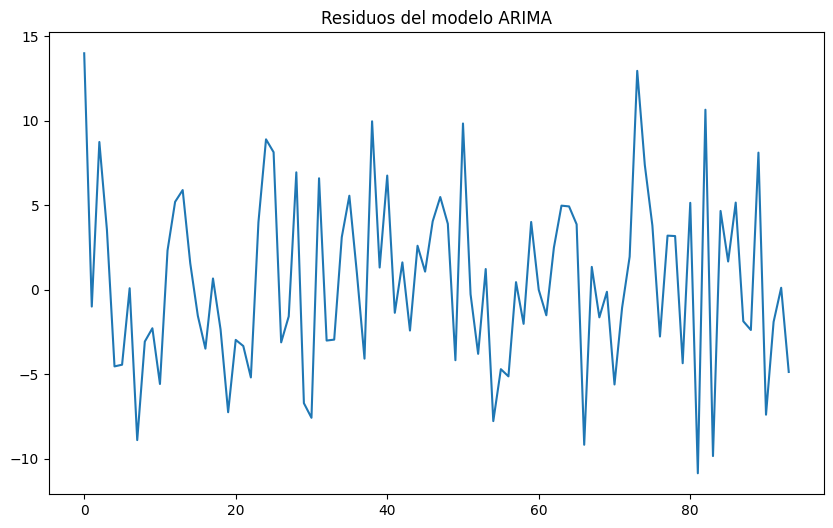

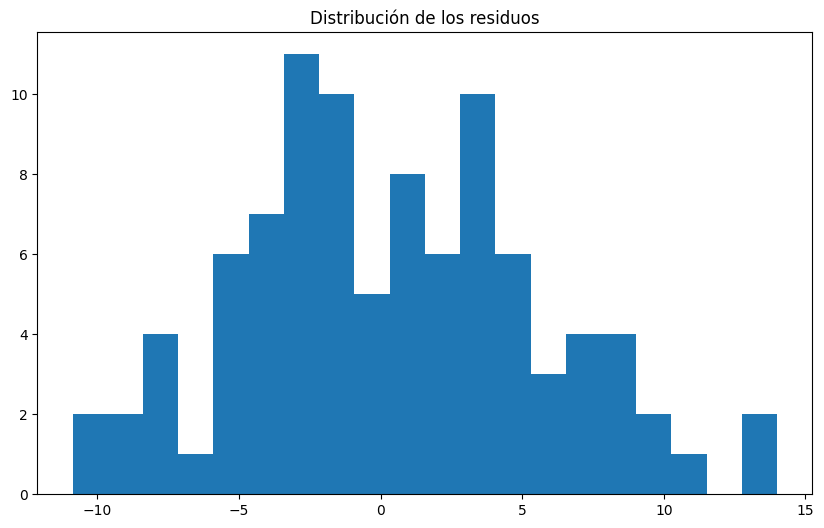

In [ ]:
# Importar el modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA(p=1, d=1, q=1)
model = ARIMA(df['Num_referidos'], order=(1, 1, 1))
arima_result = model.fit()

# Resumen de los resultados
print(arima_result.summary())

# Graficar los residuos para verificar estacionariedad
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuos del modelo ARIMA')
plt.show()

# Graficar distribución de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20)
plt.title('Distribución de los residuos')
plt.show()


# Paso 4: Probar un Modelo SARIMA

                                     SARIMAX Results                                      
Dep. Variable:                      Num_referidos   No. Observations:                   94
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -250.867
Date:                            Thu, 07 Nov 2024   AIC                            511.735
Time:                                    00:06:25   BIC                            523.707
Sample:                                         0   HQIC                           516.538
                                             - 94                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2375      0.135      1.757      0.079      -0.027       0.503
ma.L1         -0.9994      5.478   

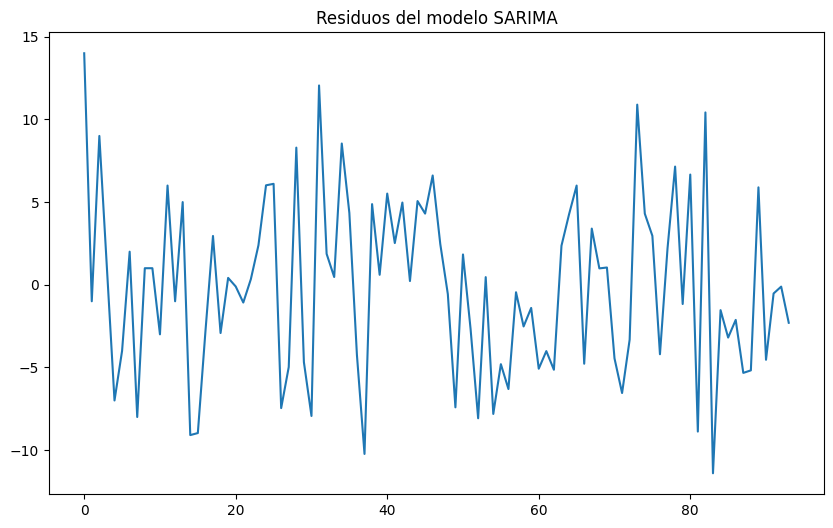

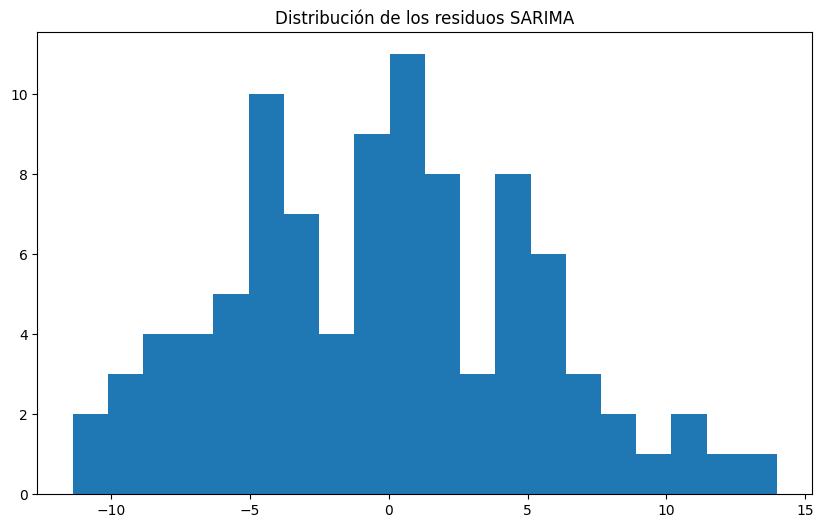

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con estacionalidad
sarima_model = SARIMAX(df['Num_referidos'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Resumen de los resultados
print(sarima_result.summary())

# Graficar los residuos para verificar si hay mejora
residuals_sarima = sarima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals_sarima)
plt.title('Residuos del modelo SARIMA')
plt.show()

# Graficar distribución de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuals_sarima, bins=20)
plt.title('Distribución de los residuos SARIMA')
plt.show()


# Paso 5: Busqueda de parámetros con SAIRMA y proyeccion

Mejores parámetros SARIMA: ((0, 1, 1), (0, 1, 1, 12)) con AIC: 422.58848865726935


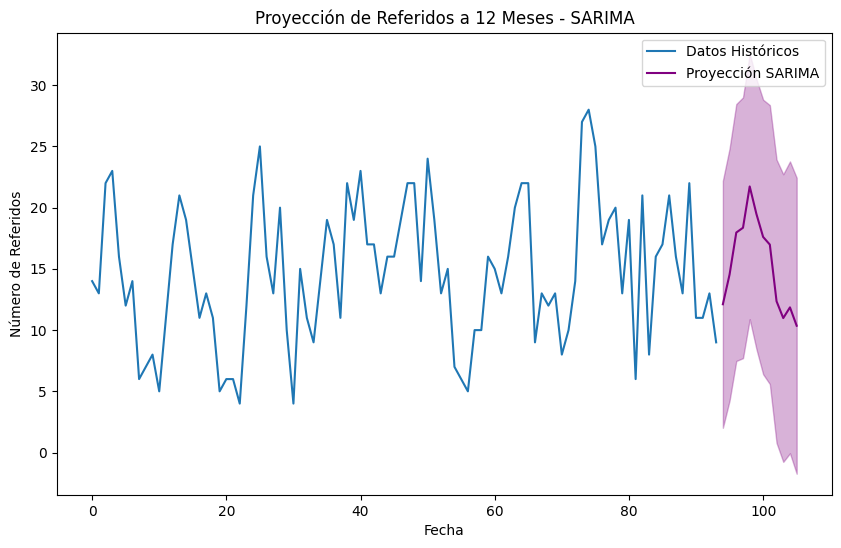

In [ ]:
import itertools
import statsmodels.api as sm

# Definir los rangos de parámetros para SARIMA
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Variable para almacenar el mejor modelo
best_aic = float("inf")
best_params = None

# Prueba de cada combinación de parámetros
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(df['Num_referidos'],
                                 order=param,
                                 seasonal_order=seasonal_param,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = mod.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
        except:
            continue

print(f"Mejores parámetros SARIMA: {best_params} con AIC: {best_aic}")

# Ajuste del mejor modelo encontrado
mejor_modelo = sm.tsa.SARIMAX(df['Num_referidos'],
                              order=best_params[0],
                              seasonal_order=best_params[1],
                              enforce_stationarity=False,
                              enforce_invertibility=False)
resultado_mejor_modelo = mejor_modelo.fit()

# Proyección a 12 meses
forecast_mejor = resultado_mejor_modelo.get_forecast(steps=12)
forecast_ci_mejor = forecast_mejor.conf_int()

# Graficar proyección junto con los datos históricos
plt.figure(figsize=(10, 6))
plt.plot( df['Num_referidos'],label='Datos Históricos')
plt.plot(forecast_mejor.predicted_mean, label='Proyección SARIMA', color='purple')
plt.fill_between(forecast_ci_mejor.index, forecast_ci_mejor.iloc[:, 0], forecast_ci_mejor.iloc[:, 1], color='purple', alpha=0.3)
plt.title('Proyección de Referidos a 12 Meses - SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Referidos')
plt.legend()
plt.show()


In [ ]:
# Verifica que la columna de fechas exista y esté en el formato adecuado
if 'Fecha' in df.columns:
    # Convierte la columna 'Fecha' a tipo datetime si no lo es
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

    # Establece 'Fecha' como índice
    df.set_index('Fecha', inplace=True)

    # Verifica el índice
    print("Índice después de ajustar:", df.index)

else:
    print("La columna 'Fecha' no se encontró en el DataFrame.")

# Comprueba nuevamente la última fecha para asegurarte de que el índice es correcto
print("Última fecha en datos históricos:", df.index[-1])


Índice después de ajustar: DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-0

In [ ]:
# Asignar frecuencia mensual explícita al índice de fechas
df = df.asfreq('MS')  # 'MS' indica inicio de mes, puedes ajustar si usas final de mes con 'M'

# Verificar que la frecuencia se ha asignado correctamente
print("Frecuencia del índice después de ajustar:", df.index.freq)


Frecuencia del índice después de ajustar: <MonthBegin>


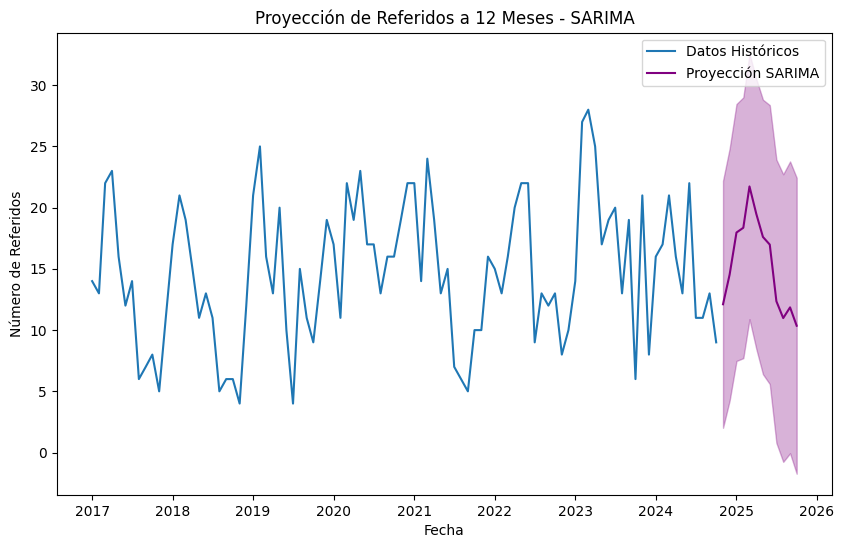

In [ ]:
# Crear un nuevo DataFrame que contenga la proyección y el intervalo de confianza
proyeccion_df = pd.DataFrame({
    'Proyección': forecast_mejor.predicted_mean.values,
    'Límite Inferior': forecast_ci_mejor.iloc[:, 0].values,
    'Límite Superior': forecast_ci_mejor.iloc[:, 1].values
}, index=nuevo_indice)

# Graficar proyección junto con los datos históricos
plt.figure(figsize=(10, 6))
plt.plot(df['Num_referidos'], label='Datos Históricos')
plt.plot(proyeccion_df['Proyección'], label='Proyección SARIMA', color='purple')
plt.fill_between(proyeccion_df.index,
                 proyeccion_df['Límite Inferior'],
                 proyeccion_df['Límite Superior'],
                 color='purple', alpha=0.3)
plt.title('Proyección de Referidos a 12 Meses - SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Número de Referidos')
plt.legend()
plt.show()


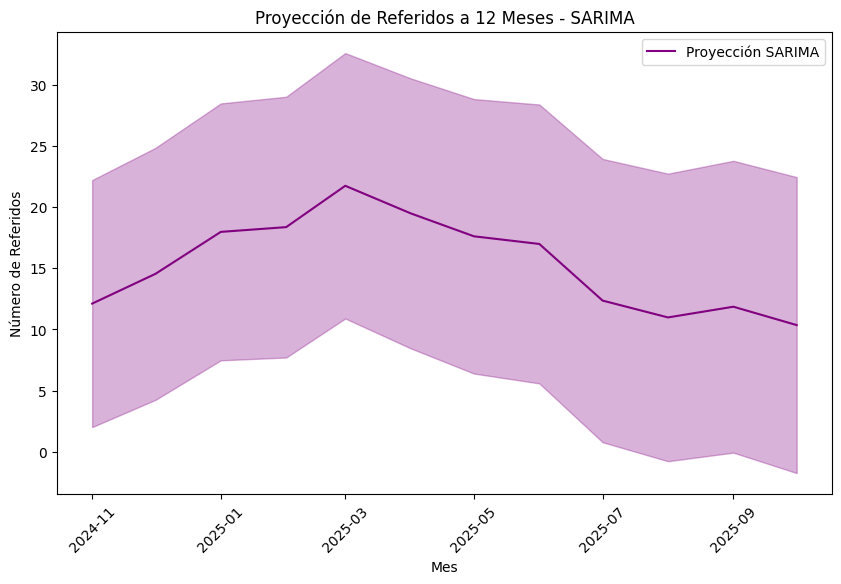

In [ ]:
# prompt: grafica solo las proyecciones para que se vean los meses

# ... (Your existing code) ...

# Proyección a 12 meses
forecast_mejor = resultado_mejor_modelo.get_forecast(steps=12)
forecast_ci_mejor = forecast_mejor.conf_int()

# Crear un nuevo índice para la proyección (meses futuros)
ultima_fecha = df.index[-1]
nuevo_indice = pd.date_range(start=ultima_fecha + pd.DateOffset(months=1), periods=12, freq='MS')

# Crear un nuevo DataFrame que contenga la proyección y el intervalo de confianza
proyeccion_df = pd.DataFrame({
    'Proyección': forecast_mejor.predicted_mean.values,
    'Límite Inferior': forecast_ci_mejor.iloc[:, 0].values,
    'Límite Superior': forecast_ci_mejor.iloc[:, 1].values
}, index=nuevo_indice)

# Graficar solo la proyección con los meses en el eje x
plt.figure(figsize=(10, 6))
plt.plot(proyeccion_df['Proyección'], label='Proyección SARIMA', color='purple')
plt.fill_between(proyeccion_df.index,
                 proyeccion_df['Límite Inferior'],
                 proyeccion_df['Límite Superior'],
                 color='purple', alpha=0.3)
plt.title('Proyección de Referidos a 12 Meses - SARIMA')
plt.xlabel('Mes')
plt.ylabel('Número de Referidos')
plt.legend()
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [ ]:
# prompt: dame una tabla con los valores de las proyecciones

# ... (Your existing code) ...

# Proyección a 12 meses
forecast_mejor = resultado_mejor_modelo.get_forecast(steps=12)
forecast_ci_mejor = forecast_mejor.conf_int()

# Crear un nuevo índice para la proyección (meses futuros)
ultima_fecha = df.index[-1]
nuevo_indice = pd.date_range(start=ultima_fecha + pd.DateOffset(months=1), periods=12, freq='MS')

# Crear un nuevo DataFrame que contenga la proyección y el intervalo de confianza
proyeccion_df = pd.DataFrame({
    'Proyección': forecast_mejor.predicted_mean.values,
    'Límite Inferior': forecast_ci_mejor.iloc[:, 0].values,
    'Límite Superior': forecast_ci_mejor.iloc[:, 1].values
}, index=nuevo_indice)

# Mostrar la tabla de proyección
proyeccion_df

,Proyección,Límite Inferior,Límite Superior
2024-11-01,12.111162,2.024556,22.197767
2024-12-01,14.539720,4.249491,24.829949
2025-01-01,17.968309,7.478409,28.458208
2025-02-01,18.357258,7.710063,29.004453
2025-03-01,21.732250,10.894948,32.569552
2025-04-01,19.482257,8.458126,30.506388
2025-05-01,17.607258,6.399411,28.815105
2025-06-01,16.982252,5.593653,28.370851
2025-07-01,12.357261,0.790734,23.923788
2025-08-01,10.982260,-0.759499,22.724019


# GRAFICOS

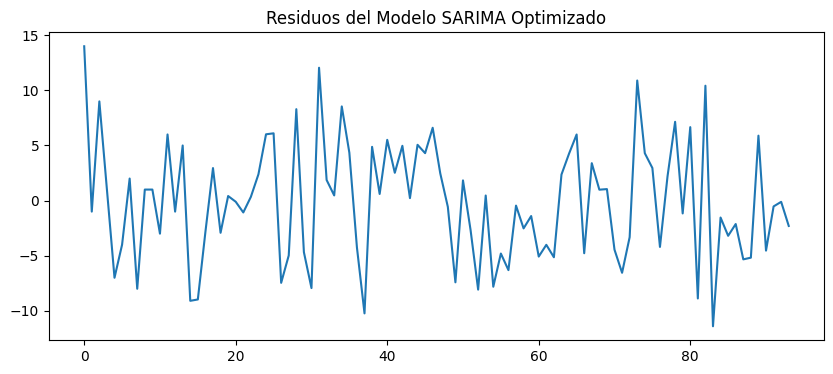

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Graficar residuos
plt.figure(figsize=(10, 4))
plt.plot(residuals_sarima)
plt.title('Residuos del Modelo SARIMA Optimizado')
plt.show()


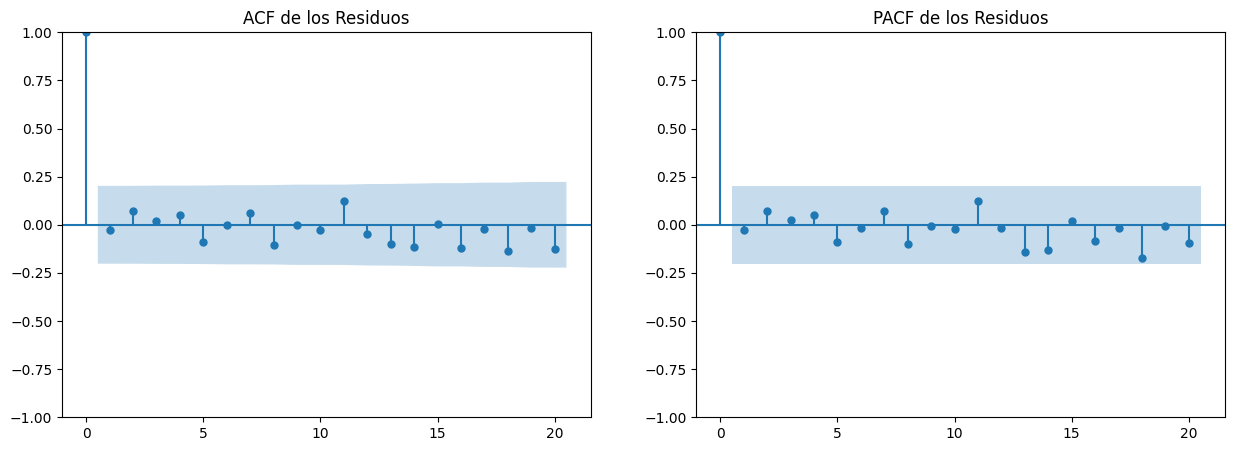

In [ ]:
# Correlograma ACF y PACF de los residuos
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_acf(residuals_sarima, ax=ax[0], lags=20)
ax[0].set_title("ACF de los Residuos")
plot_pacf(residuals_sarima, ax=ax[1], lags=20)
ax[1].set_title("PACF de los Residuos")
plt.show()


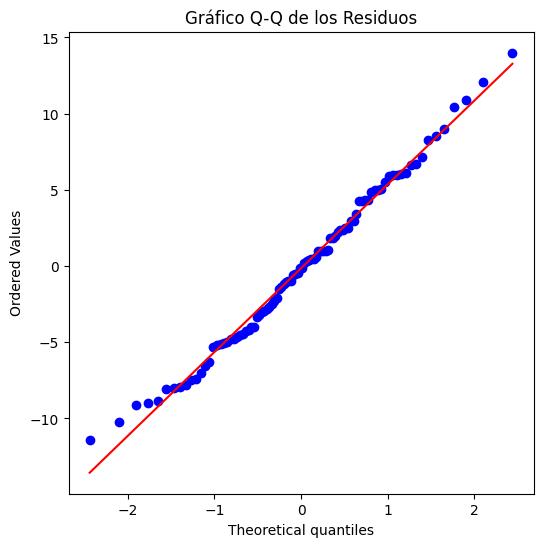

In [ ]:
import scipy.stats as stats

# Gráfico Q-Q de normalidad de los residuos
plt.figure(figsize=(6, 6))
stats.probplot(residuals_sarima, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de los Residuos")
plt.show()


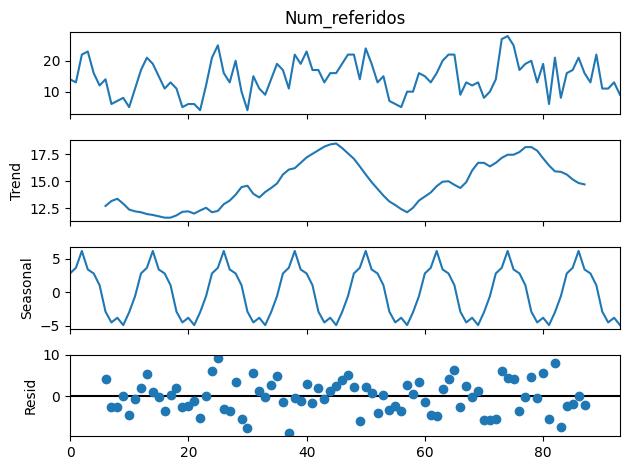

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición estacional
descomposicion = seasonal_decompose(df['Num_referidos'], model='additive', period=12)
descomposicion.plot()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Predicciones del modelo ARIMA
arima_predictions = arima_result.predict(start=len(df['Num_referidos']) - 12, end=len(df['Num_referidos']) + 11)

# Predicciones del modelo SARIMA
sarima_predictions = resultado_mejor_modelo.get_forecast(steps=12).predicted_mean

# Calcular el RMSE para ARIMA
rmse_arima = np.sqrt(mean_squared_error(df['Num_referidos'][-12:], arima_predictions[:12]))
print(f"RMSE para ARIMA: {rmse_arima}")


# Calcular el RMSE para SARIMA
rmse_sarima = np.sqrt(mean_squared_error(df['Num_referidos'][-12:], sarima_predictions))
print(f"RMSE para SARIMA: {rmse_sarima}")


RMSE para ARIMA: 5.9097102885813415
RMSE para SARIMA: 3.99534305167997
